In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

a. Calculate Log Returns

对数收益率：
1    0.005553
2   -0.011988
3    0.000933
4    0.021483
5   -0.032039
Name: XYZ, dtype: float64


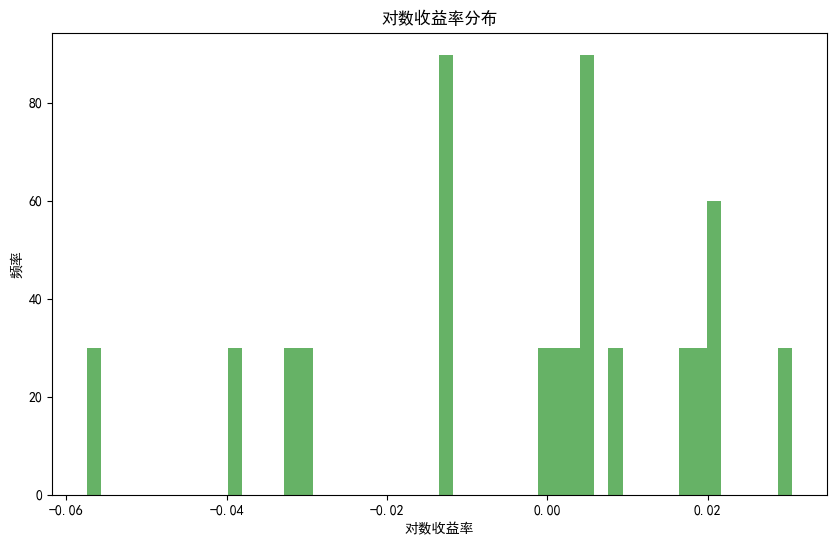

In [19]:
# 读取CSV文件
data = pd.read_csv('problem1.csv')

# 假设数据中包含价格列 'XYZ'
prices = data['XYZ']

# 计算对数收益率
log_returns = np.log(prices / prices.shift(1)).dropna()

# 显示对数收益率
print("对数收益率：")
print(log_returns.head())

# 绘制对数收益率的分布图
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, density=True, alpha=0.6, color='g')
plt.title('对数收益率分布')
plt.xlabel('对数收益率')
plt.ylabel('频率')
plt.show()


b. Fit a normal and a Student t distribution to these series and present the fitted parameters

正态分布拟合参数: 均值 = -0.003023851474658956, 标准差 = 0.02262542478856511
学生t分布拟合参数: 自由度 = 4361534292.275997, 均值 = -0.0030238618945462436, 标准差 = 0.02262541593783346


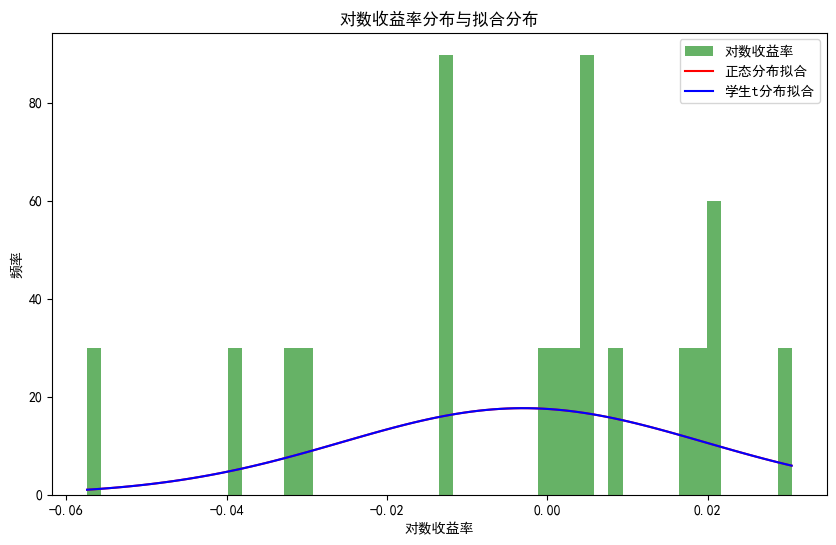

In [20]:
# 拟合正态分布
mu, std = stats.norm.fit(log_returns)

# 拟合学生t分布
df, loc, scale = stats.t.fit(log_returns)

# 打印拟合参数
print(f"正态分布拟合参数: 均值 = {mu}, 标准差 = {std}")
print(f"学生t分布拟合参数: 自由度 = {df}, 均值 = {loc}, 标准差 = {scale}")

# 绘制拟合的正态分布和学生t分布的概率密度函数
x = np.linspace(log_returns.min(), log_returns.max(), 100)
normal_pdf = stats.norm.pdf(x, mu, std)
t_pdf = stats.t.pdf(x, df, loc, scale)

plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, density=True, alpha=0.6, color='g', label='对数收益率')
plt.plot(x, normal_pdf, 'r-', label='正态分布拟合')
plt.plot(x, t_pdf, 'b-', label='学生t分布拟合')
plt.legend()
plt.title('对数收益率分布与拟合分布')
plt.xlabel('对数收益率')
plt.ylabel('频率')
plt.show()


c. Which is the better fit?

In [21]:
# 计算正态分布的负对数似然
nll_normal = -np.sum(stats.norm.logpdf(log_returns, mu, std))

# 计算学生t分布的负对数似然
nll_t = -np.sum(stats.t.logpdf(log_returns, df, loc, scale))

print(f"正态分布的负对数似然: {nll_normal}")
print(f"学生t分布的负对数似然: {nll_t}")

# 比较两个分布的拟合效果
if nll_normal < nll_t:
    print("正态分布拟合效果更好")
else:
    print("学生t分布拟合效果更好")


正态分布的负对数似然: -45.02510714246804
学生t分布的负对数似然: -45.025107142279346
正态分布拟合效果更好
